Bibliotecas necessárias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# AM DSB no domínio do tempo


$s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ 

Onde: 

$m(t)=A_mcos(2 \pi f_mt)$ 

e a portadora é $c(t)=A_ccos(2 \pi f_ct)$


# amplitude do sinal de info - am
# frequencia do sinal de info - fm
# amplitude da portadora - ac
# frequencia da portadora - fc
# sensibilidade  -ka

Am=1 - fm=1000 - Ac=1 - fc=10000 - Ka=0.5

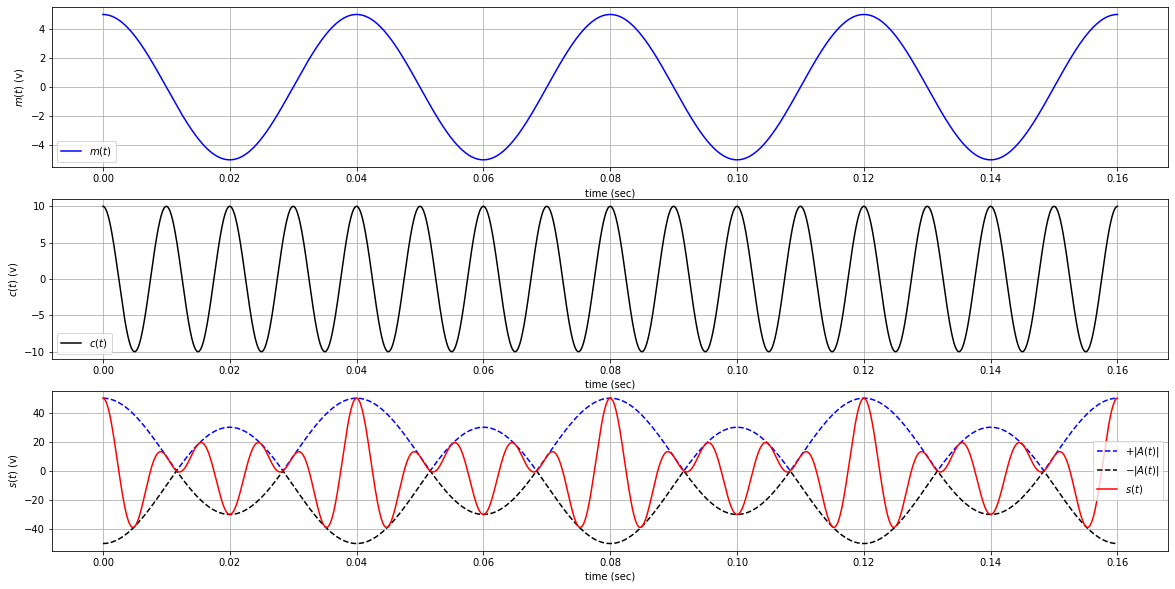

In [ ]:
A_c = 10
f_c = 100
A_m = 5
f_m = 25
m = 0.8
k = m*A_m/A_c


Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # tempo
mt=Am*np.cos(2*math.pi*fm*t) # informacao
ct=Ac*np.cos(2*math.pi*fc*t) # portadora
st=(1+Ka*mt)*ct # AM DSB
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()




# AM DSB no domínio da frequencia

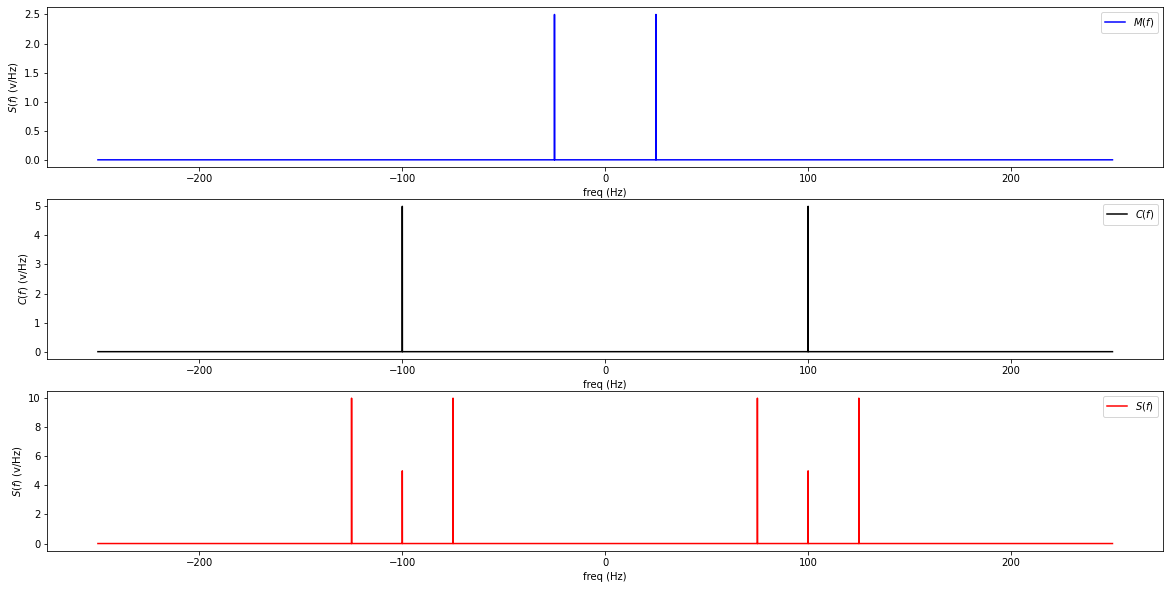

In [ ]:
## dominio da frequencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # normal AM modulation
At=Ac*(1+Ka*mt)

#plots
f = plt.figure(figsize=(20,10))
ax2 = f.add_subplot(311)
ax4 = f.add_subplot(312)
ax6 = f.add_subplot(313)

##FFT
Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


#**Exercício**: Mude os valores dos seguintes parâmetros e observe o sinal e seu espectro: 
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\
5- $K_a$ \\

# The effect of changing the AM modulation index $\mu$

In this section, we will investigate the effect of changing the modulation index $\mu$

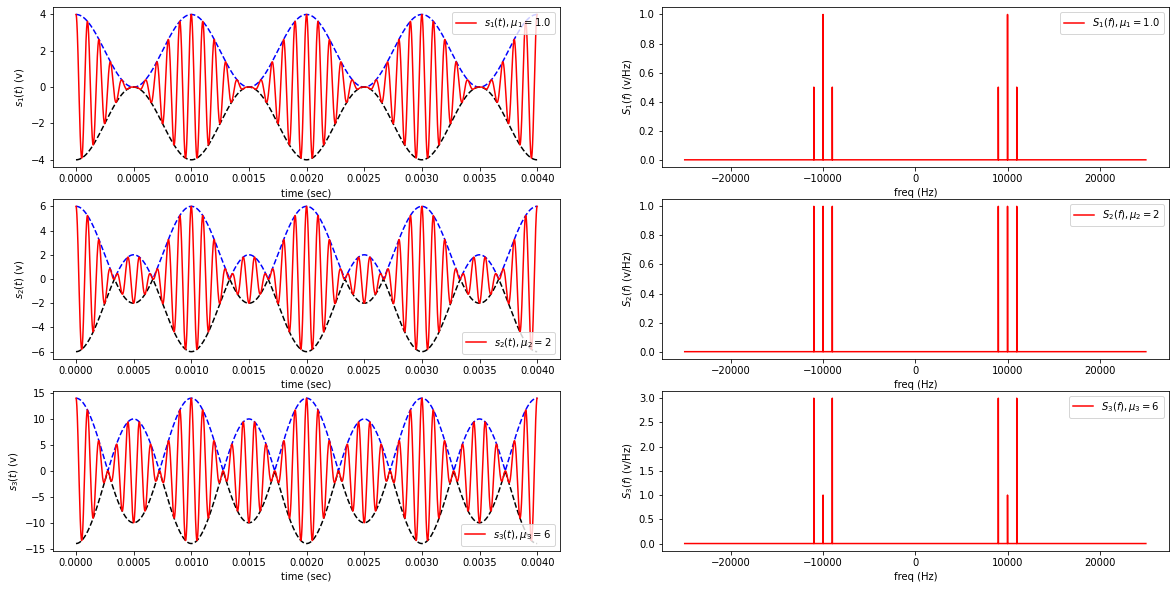

In [ ]:
Am1=0.5  # amplitude do sinal um
Am2=1 # amplitude do sinal dois
Am3=3 # amplitude do sinal 3
fm=1000 # frequencia dos sinais um, dois e três

Ac=2 # amplitude da portadora
fc=10000 # frequencia da portadora
Ka=2 # sensibilidade em amplitude

Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # tempo
mt1=Am1*np.cos(2*math.pi*fm*t) # sinal um
mt2=Am2*np.cos(2*math.pi*fm*t) # sinal dois
mt3=Am3*np.cos(2*math.pi*fm*t) # sinal 3
ct=Ac*np.cos(2*math.pi*fc*t) # portadora
st1=(1+Ka*mt1)*ct # AM DSB
st2=(1+Ka*mt2)*ct # AM DSB
st3=(1+Ka*mt3)*ct # Am DSB
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka # indice de modulação ->  ganho * amplitude da info
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()

#gerando os mesmo sinais
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) 
mt1=Am1*np.cos(2*math.pi*fm*t) 
mt2=Am2*np.cos(2*math.pi*fm*t)
mt3=Am3*np.cos(2*math.pi*fm*t) 
ct=Ac*np.cos(2*math.pi*fc*t) 
st1=(1+Ka*mt1)*ct 
st2=(1+Ka*mt2)*ct 
st3=(1+Ka*mt3)*ct 
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

#**Exercício**: mude os valores dos seguintes parâmetros e observe os sinais gerados e seus respectivos espectros:
1- $A_{m1}$, $A_{m2}$, and $A_{m3}$  \\
2- $K_a$ \\

# AM DSB em um sinal com múltiplas harmônicas 

Sinal: $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

In [ ]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # info 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # info 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # info 3
   mt=m1t+m2t+m3t # sinal
   return mt

In [ ]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # portadora
   return ct

In [ ]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # AM DSB
   return st

Gerando o sinal composto por três frequências:

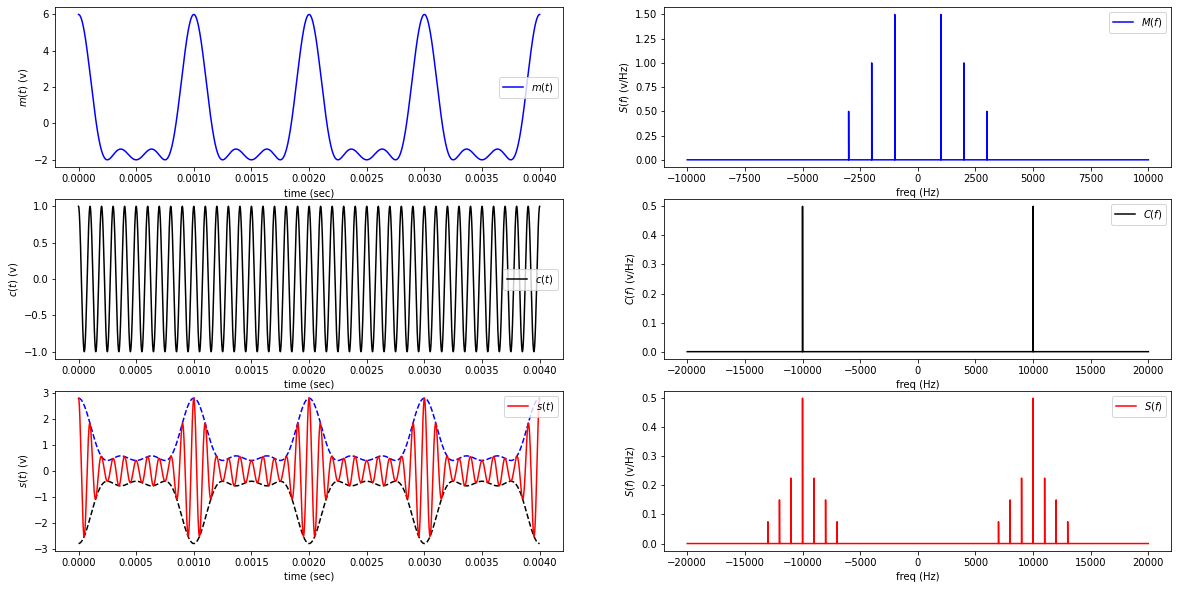

In [ ]:
Am1=3 #volts
fm1=1000 #Hz

Am2=2 
fm2=2000 

Am3=1 
fm3=3000 

Ac=1 # amplitude da portadora
fc=10000 # frequencia da portadora
Ka=0.3 # ganho (sensibilidade em amplitude)

fm1_3=[fm1,fm2,fm3]


## obtendo a frequencia fundamental do sinal - apenas para gerar os gráficos com a freq de amostragem ideal
fm=np.gcd.reduce(fm1_3)

Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # tempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # informacao
ct=func_ct(Ac,fc,t) # portadora
st=Am_mod(mt,ct,Ka) # Am DSB
At=np.abs(Ac*(1+Ka*mt)) #envoltória usada nos gráficos

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot 
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## dominio da frequencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # tempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # mensagem

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # tempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t) # carrier
st=Am_mod(mt,ct,Ka) # normal AM modulation
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter nbconvert --to html AM_DSB_tempo_frequencia.ipynb

[NbConvertApp] WARNING | pattern 'AM_DSB_tempo_frequencia.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
-